##  import the library


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('iris.csv')
dataset.shape

(150, 5)

In [3]:
dataset.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.keys()

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

In [6]:
dataset['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
dataset.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(array([ 4.,  5.,  7., 16.,  9.,  5., 13., 14., 10.,  6., 10., 16.,  7.,
        11.,  4.,  2.,  4.,  1.,  5.,  1.]),
 array([4.3 , 4.48, 4.66, 4.84, 5.02, 5.2 , 5.38, 5.56, 5.74, 5.92, 6.1 ,
        6.28, 6.46, 6.64, 6.82, 7.  , 7.18, 7.36, 7.54, 7.72, 7.9 ]),
 [<matplotlib.patches.Polygon at 0x7f21199b5610>])

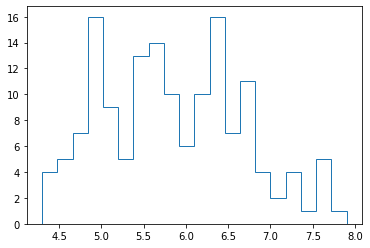

In [10]:
plt.hist(x='sepallength', bins=20, data=dataset, histtype='step')

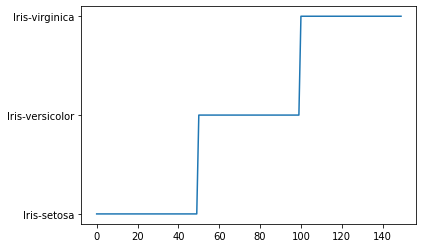

In [13]:
plt.plot(dataset['class'],data=dataset)

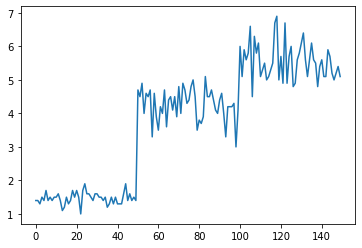

In [15]:
plt.plot(dataset['petallength'],data=dataset)

/home/sumit/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


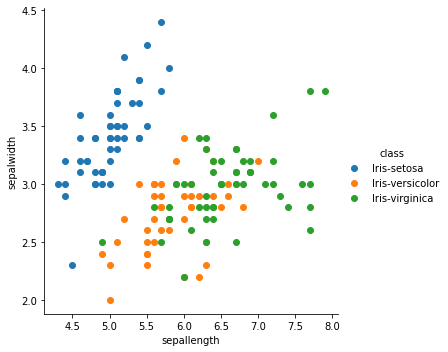

In [16]:
sns.FacetGrid(dataset, hue='class',size=5).map(plt.scatter, 'sepallength', 'sepalwidth').add_legend()

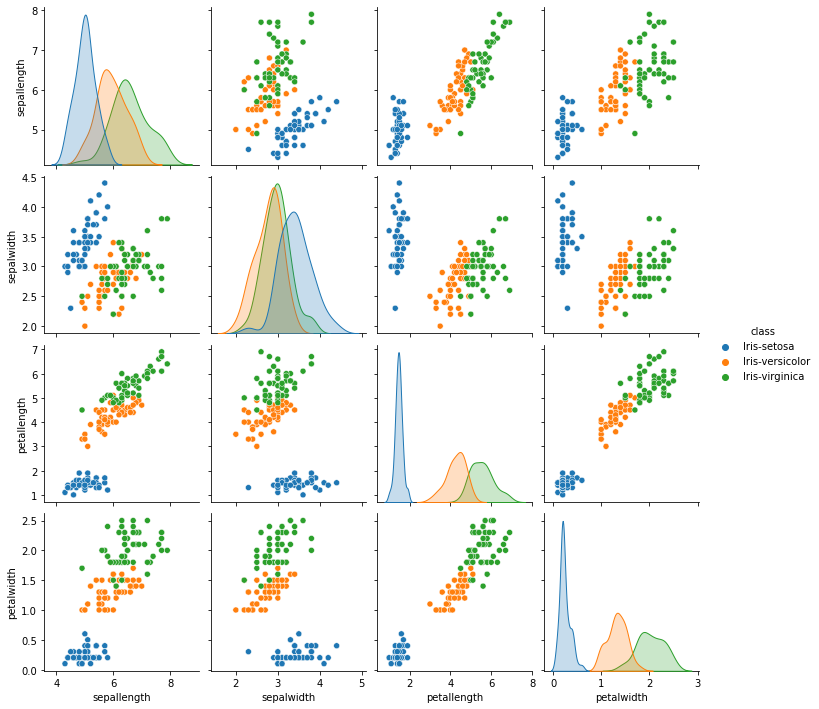

In [17]:
sns.pairplot(dataset, hue='class')

In [21]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [74]:
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [75]:
dataset.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [50]:
from sklearn.model_selection import train_test_split

x_train ,x_test , y_train ,y_test=train_test_split(X, y, test_size=0.3, random_state=4)
x_train.shape ,x_test.shape , y_train.shape ,y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [52]:
logistic=LogisticRegression()
logistic.fit(x_train ,y_train)
print(logistic.score(x_train ,y_train))

0.9809523809523809


/home/sumit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
print((logistic.score(x_test , y_test)))
predict1=logistic.predict(x_test)


0.9777777777777777


In [56]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score

print(confusion_matrix(y_test ,predict1 ))


[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


In [63]:
print(classification_report(y_test, predict1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [66]:
predict1[:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [67]:
y_test[:5]

128    Iris-virginica
18        Iris-setosa
130    Iris-virginica
105    Iris-virginica
107    Iris-virginica
Name: class, dtype: object

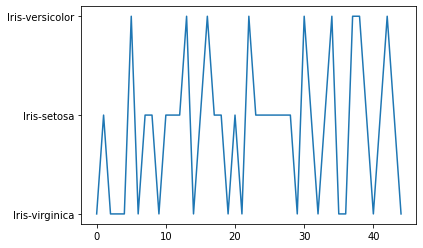

In [68]:
plt.plot(predict1)

(array([14.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 20 artists>)

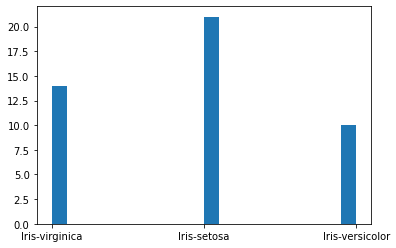

In [71]:
plt.hist(y_test, bins=20)

(array([15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 20 artists>)

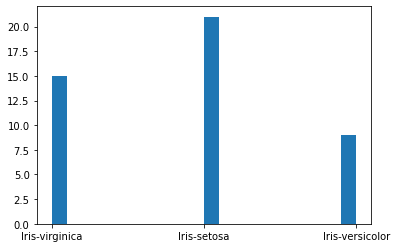

In [73]:
plt.hist(predict1, bins=20)